##**Bigmart Sales Analysis**

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
!wget "https://github.com/akki8087/Big-Mart-Sales/raw/master/Train.csv"

--2020-10-01 06:22:31--  https://github.com/akki8087/Big-Mart-Sales/raw/master/Train.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv [following]
--2020-10-01 06:22:32--  https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861013 (841K) [text/plain]
Saving to: ‘Train.csv.1’

Train.csv.1         100%[===================>] 840.83K  --.-KB/s    in 0.04s   

2020-10-01 06:22:32 (21.0 MB/s) - ‘Train.csv.1’ saved [861013/861013]



### Read the Dataset

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###Handling Redundant Values

In [ ]:
print("Unique Values in Item_Fat_Content before modification - ",df['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content before modification -  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)
df['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)

In [ ]:
print("Unique Values in Item_Fat_Content after modification - ",df['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after modification -  ['Low Fat' 'Regular']


### Perform One Hot encoding

In [ ]:
col_enc = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
           'Outlet_Location_Type', 'Outlet_Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for x in col_enc:
  lb_encoder = LabelEncoder()
  df[x] = lb_encoder.fit_transform(df[x])
  le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
  print(le_name_mapping)




{'DRA12': 0, 'DRA24': 1, 'DRA59': 2, 'DRB01': 3, 'DRB13': 4, 'DRB24': 5, 'DRB25': 6, 'DRB48': 7, 'DRC01': 8, 'DRC12': 9, 'DRC13': 10, 'DRC24': 11, 'DRC25': 12, 'DRC27': 13, 'DRC36': 14, 'DRC49': 15, 'DRD01': 16, 'DRD12': 17, 'DRD13': 18, 'DRD15': 19, 'DRD24': 20, 'DRD25': 21, 'DRD27': 22, 'DRD37': 23, 'DRD49': 24, 'DRD60': 25, 'DRE01': 26, 'DRE03': 27, 'DRE12': 28, 'DRE13': 29, 'DRE15': 30, 'DRE25': 31, 'DRE27': 32, 'DRE37': 33, 'DRE48': 34, 'DRE49': 35, 'DRE60': 36, 'DRF01': 37, 'DRF03': 38, 'DRF13': 39, 'DRF15': 40, 'DRF23': 41, 'DRF25': 42, 'DRF27': 43, 'DRF36': 44, 'DRF37': 45, 'DRF48': 46, 'DRF49': 47, 'DRF51': 48, 'DRF60': 49, 'DRG01': 50, 'DRG03': 51, 'DRG11': 52, 'DRG13': 53, 'DRG15': 54, 'DRG23': 55, 'DRG25': 56, 'DRG27': 57, 'DRG36': 58, 'DRG37': 59, 'DRG39': 60, 'DRG48': 61, 'DRG49': 62, 'DRG51': 63, 'DRH01': 64, 'DRH03': 65, 'DRH11': 66, 'DRH13': 67, 'DRH15': 68, 'DRH23': 69, 'DRH25': 70, 'DRH36': 71, 'DRH37': 72, 'DRH39': 73, 'DRH49': 74, 'DRH51': 75, 'DRH59': 76, 'DRI01':

### Plotting the Correlation Heatmap

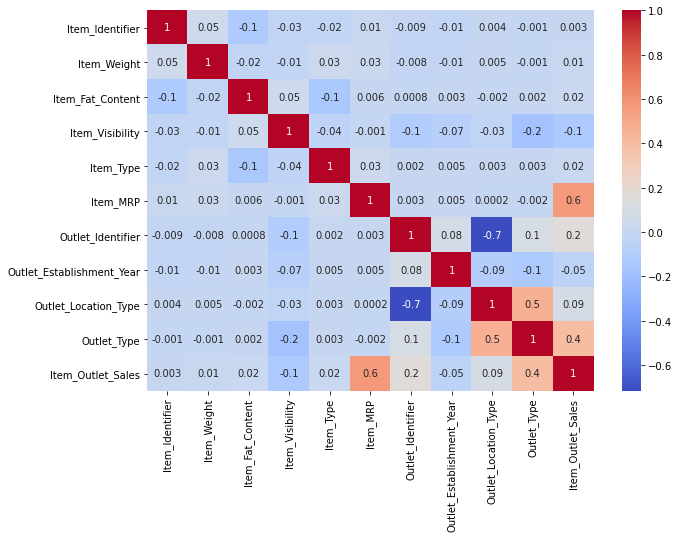

In [ ]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='0.1g', ax=ax)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


### Filling NULL values using Linear Regression

In [ ]:
cols = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [ ]:
data = df[cols]
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
test_df = data[data["Item_Weight"].isnull()]

In [ ]:
from sklearn.linear_model import LinearRegression
data = data.dropna()

y_train = data["Item_Weight"]
X_train = data.drop("Item_Weight", axis=1)

X_test = test_df.drop("Item_Weight", axis=1)

#train model to fit dataset and predict missing values from column "Age"
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#replace the missing values with predicted values
df.loc[df.Item_Weight.isnull(), 'Item_Weight'] = y_pred

In [ ]:
df['Item_Weight'].describe()

count    8523.000000
mean       12.892174
std         4.228710
min         4.555000
25%         9.310000
50%        12.958954
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
lb_encoder = LabelEncoder()
df['Outlet_Size'] = lb_encoder.fit_transform(df['Outlet_Size'])
le_name_mapping = dict(zip(lb_encoder.classes_, lb_encoder.transform(lb_encoder.classes_)))
print(le_name_mapping)

{'High': 0, 'Medium': 1, 'Small': 2}


In [ ]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.892174,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.228710,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.958954,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


### Finding the best Model for Prediction of Sales Data

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 8.4MB/s 
     |████████████████████████████████| 266kB 15.9MB/s 
     |████████████████████████████████| 266kB 21.3MB/s 
     |████████████████████████████████| 13.9MB 316kB/s 
     |████████████████████████████████| 66.1MB 60kB/s 
     |████████████████████████████████| 1.6MB 47.0MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 6.8MB 47.4MB/s 
     |████████████████████████████████| 174kB 47.8MB/s 
     |████████████████████████████████| 1.8MB 48.1MB/s 
     |████████████████████████████████| 3.1MB 47.2MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 604kB 44.7MB/s 
     |████████████████████████████████| 1.1MB 45.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 6.0MB 34.9MB/s 
 

In [ ]:
from pycaret.regression import setup, compare_models
experiment = setup(df, target = 'Item_Outlet_Sales')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,703
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(8523, 12)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,756.0732,1153649.1192,1073.3676,0.5887,0.5584,0.5710,0.6013
1,Gradient Boosting Regressor,756.5266,1153345.0669,1073.2996,0.5886,0.5560,0.5711,1.4152
2,Light Gradient Boosting Machine,770.2918,1211503.8140,1099.5381,0.5678,0.5587,0.5719,0.1317
3,CatBoost Regressor,777.3914,1217093.5361,1102.2449,0.5659,0.5870,0.5854,2.9337
4,Random Forest,781.0856,1233703.0613,1109.3931,0.5599,0.5526,0.5691,3.2951
5,Orthogonal Matching Pursuit,831.8030,1250761.2990,1117.5678,0.5541,0.7221,1.0203,0.0090
6,Lasso Regression,831.8921,1253344.9467,1118.6808,0.5532,0.7230,1.0151,0.0589
7,Bayesian Ridge,832.6587,1255774.9098,1119.7737,0.5523,0.7307,1.0128,0.0250
8,Ridge Regression,833.1711,1256190.2653,1119.9668,0.5522,0.7256,1.0183,0.0093
9,Linear Regression,833.2330,1256258.2572,1119.9981,0.5521,0.7260,1.0188,0.0190


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=703,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)